In [1]:
%matplotlib inline

import seaborn as sns
import brightside as bs
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
epochs, train_loss, train_acc, val_loss, val_acc = np.loadtxt('training.log', delimiter=' ', 
                                                              usecols=(1, 3, 5, 7, 9), unpack=True)
labels = ['Train', 'Validation']

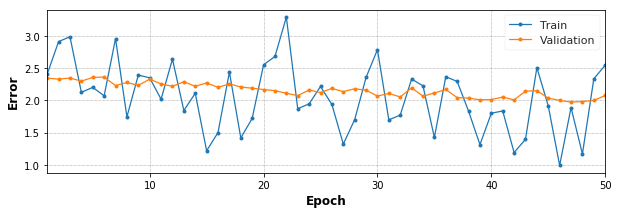

In [3]:
fig, ax = bs.plot_loss([train_loss,val_loss], labels, epochs=epochs, figsize=(10,3))
plt.savefig('loss_plot.png', format='png', dpi=300)

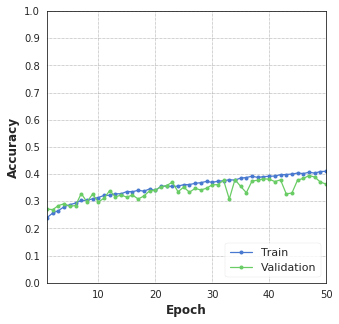

In [4]:
fig, ax = bs.plot_accuracy([train_acc,val_acc], labels, epochs=epochs, figsize=(5,5))
plt.savefig('acc_plot.png', format='png', dpi=300)

In [5]:
predictions, groundtruth = np.loadtxt('predictions.csv', delimiter=' ', unpack=True)
labels = np.genfromtxt('labels.txt',dtype='str')

/disk1/b.aca/epic_challenge/brightside/__init__.py:103: UserWarning: One or more classes does not have instances
  warnings.warn('One or more classes does not have instances')


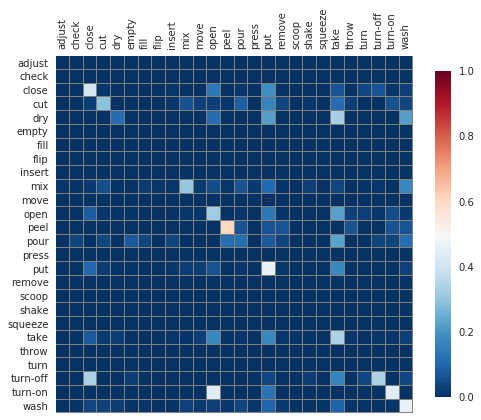

In [6]:
fig, ax = bs.show_confusion_matrix(predictions, groundtruth, labels,
                                   figsize=(8,8), annot=False,
                                   linewidths=0.005, linecolor='gray',
                                   square=True, show_xticks=True,
                                   cbar_kws={"shrink": 0.75})
plt.savefig('cm.png', format='png', dpi=300)